# Student Data Analysis 

This dataset provides valuable information about 200,000 students who are enrolled in a fictional University. I will try to answer some questions that can better understand this data. 

In [108]:
# library imports
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import timeit

In [109]:
# File reading and storing as a data frame 

studentData_df = pd.read_csv(r'...\student_data1.csv')

In [110]:
# Change dtype for current Semester from int64 to int8 just to save some space

studentData_df['Current Semester'] = studentData_df['Current Semester'].astype('int8')

In [111]:
# Memory Usage

studentData_df.memory_usage(deep=True).sum()

65614620

## Explore Data Frame

In [112]:
# check few lines and the shape of the data frame
print(studentData_df.shape)
studentData_df.head()

(200000, 10)


,Student ID,Student Name,Date of Birth,Field of Study,Year of Admission,Expected Year of Graduation,Current Semester,Specialization,Fees,Discount on Fees
0,165527,Bryan Rogers,2006-01-19,Computer Science,2020,2017,3,Web Development,155152,19572
1,635763,James Hogan,1999-05-23,Mechanical Engineering,2020,2020,2,Machine Learning,157870,14760
2,740021,David Robinson,1997-12-02,Civil Engineering,2017,2022,1,Network Security,55662,5871
3,433076,Susan Miller,1999-10-30,Computer Science,2021,2019,1,Data Science,134955,17284
4,441628,Brittany Martin,1998-01-10,Chemical Engineering,2016,2018,1,Network Security,125934,14871


In [113]:
# column names only
studentData_df.columns

Index(['Student ID', 'Student Name', 'Date of Birth', 'Field of Study',
       'Year of Admission', 'Expected Year of Graduation', 'Current Semester',
       'Specialization', 'Fees', 'Discount on Fees'],
      dtype='object')

In [114]:
# info on columns: showing name, count of non-null values and dtype 
studentData_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   Student ID                   200000 non-null  int64 
 1   Student Name                 200000 non-null  object
 2   Date of Birth                200000 non-null  object
 3   Field of Study               200000 non-null  object
 4   Year of Admission            200000 non-null  int64 
 5   Expected Year of Graduation  200000 non-null  int64 
 6   Current Semester             200000 non-null  int8  
 7   Specialization               200000 non-null  object
 8   Fees                         200000 non-null  int64 
 9   Discount on Fees             200000 non-null  int64 
dtypes: int64(5), int8(1), object(4)
memory usage: 13.9+ MB


In [115]:
# Checking for null values
(  
    studentData_df
    .isna()
    .sum()
    )

Student ID                     0
Student Name                   0
Date of Birth                  0
Field of Study                 0
Year of Admission              0
Expected Year of Graduation    0
Current Semester               0
Specialization                 0
Fees                           0
Discount on Fees               0
dtype: int64

In [116]:
# Describe data frame summary statistics both int and object 
studentData_df.describe(exclude='object')

,Student ID,Year of Admission,Expected Year of Graduation,Current Semester,Fees,Discount on Fees
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,549367.492925,2018.997685,2019.995235,2.499020,125092.847595,12484.258575
std,259361.565011,2.002381,1.997744,1.117804,43287.894903,8788.362629
min,100001.000000,2016.000000,2017.000000,1.000000,50000.000000,0.000000
25%,325311.000000,2017.000000,2018.000000,1.000000,87641.500000,5383.000000
50%,548855.500000,2019.000000,2020.000000,2.000000,125221.000000,10792.500000
75%,774182.500000,2021.000000,2022.000000,3.000000,162597.250000,18154.000000
max,999997.000000,2022.000000,2023.000000,4.000000,200000.000000,39865.000000


In [117]:
# Describe data frame summary statistics both int and object 
(
    studentData_df
    .describe(include='object')
)

,Student Name,Date of Birth,Field of Study,Specialization
count,200000,200000,200000,200000
unique,120038,3286,5,5
top,Michael Smith,1997-05-31,Electrical Engineering,Web Development
freq,99,126,40305,40292


Name Michael Smith appeared 99 times? 

Current semester dtype can be changed from int64 to int8

## Questions 

- How many students entered school each year?
- How many students set to graduate year 2023?
- What is the distribution of students across different fields of study?
- How many students are enrolled in each specialization?
- What is the average age of the students based on their date of birth?
- How many students are enrolled in each year of admission?
- How many students are expected to graduate in each year?
- What is the distribution of students across different current semesters?
- What are the popular specializations chosen by the students?
- What is the range and distribution of fees charged for the students?
- How many students are availing discounts on their fees?
- Are there any correlations between the field of study and the specialization chosen?

Text(0.5, 1.0, 'Students Entering University per Year')

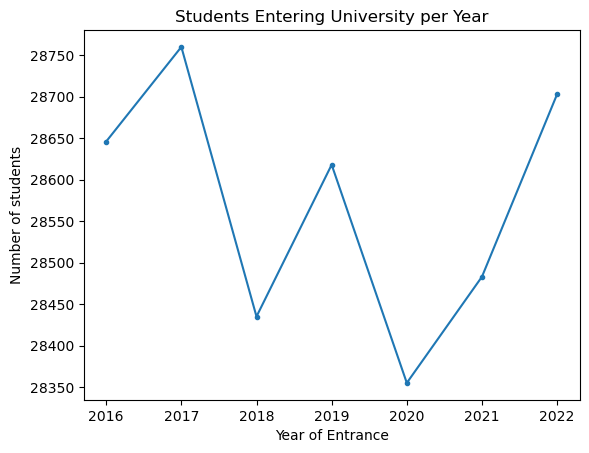

In [118]:
# How many students entered the school each yeah
(
    studentData_df
    .groupby('Year of Admission')
    ['Student ID']
    .count()
    .plot(kind='line',marker='.')

)

plt.ylabel('Number of students')
plt.xlabel('Year of Entrance')
plt.title('Students Entering University per Year')



In [ ]:
# How many students are expect to graduate Year 2023

(
    studentData_df
    .groupby('Expected Year of Graduation')
    ['Student ID']
    .get_group(2023)
    .count()
)

Students expected to graduate in 2023 are 28360. I can check all the students that have graduated in all years

<Axes: ylabel='Expected Year of Graduation'>

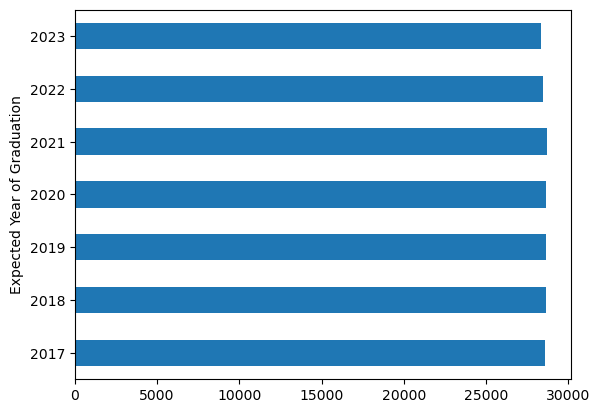

In [213]:
# How many students graduated throughout the years

(studentData_df
    .groupby('Expected Year of Graduation')
    ['Student ID']
    .count()
    .plot(kind='barh')

)

In [134]:
# Distribution of students across different fields of study 

(
    studentData_df['Field of Study']
    .value_counts()
    .to_frame()
    .reset_index()
    .rename(columns={'index': 'Field of Study', 'Field of Study': 'Student Count'})
)


,Field of Study,Student Count
0,Electrical Engineering,40305
1,Chemical Engineering,40020
2,Computer Science,39960
3,Mechanical Engineering,39941
4,Civil Engineering,39774


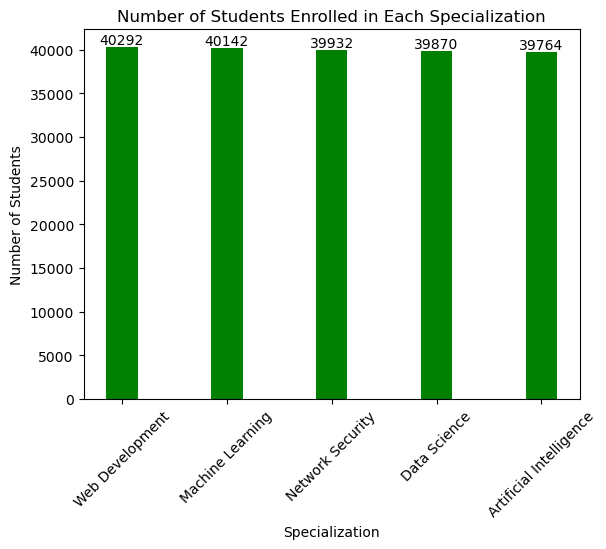

In [211]:
# How many students are enrolled in each specialization?

# Getting total count group by 
student_special = studentData_df.groupby('Specialization').size().sort_values(ascending=False)

#

# Plot 
plt.bar(student_special.index, student_special, width = 0.3, color='green')

# Setting axis values
plt.xlabel('Specialization')
plt.ylabel('Number of Students')
plt.title('Number of Students Enrolled in Each Specialization')

# 
for index,value in enumerate(student_special):
    plt.text(index,value, str(value),ha='center', va='bottom')

plt.xticks(rotation=45)
plt.show()
